In [97]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime  
from datetime import timedelta  

In [98]:
# Load Tensor
with open('../pkl/COVID_sorted_W_tensors_ver2.pkl', 'rb') as f:
    travel_data = pickle.load(f)

In [99]:
travel_data.shape

(22, 54, 108)

In [100]:
week_slices = pd.date_range('2020-01-19', periods=23, freq='W')
xaxis = week_slices[1:]

In [101]:
df = pd.read_csv("PatientInfo.csv")
df['confirmed_date'] = pd.to_datetime(df['confirmed_date'])
df = df[df['province'].isin(["Seoul", "Gyeonggi-do", "Incheon"])]

In [102]:
confdate = df['confirmed_date']
# confdate.groupby().count()

In [103]:
datecount = []

In [104]:
for x in xaxis:
    cnt=0
    for date in confdate:
        if((date<x) & (date> x-timedelta(days=7))):
            cnt=cnt+1
    datecount.append(cnt)
datecount = np.array(datecount)

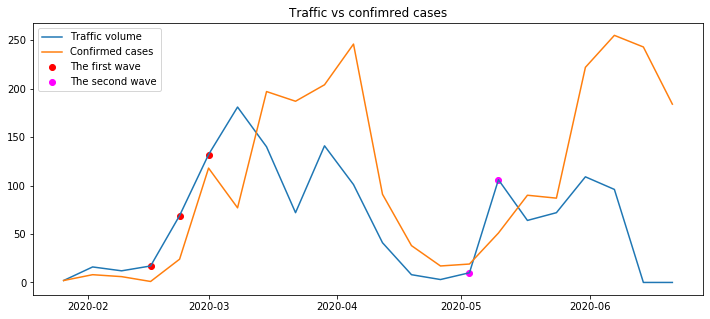

In [105]:
# travel_data.shape
tensors = travel_data[:,:,:54]
traffic = np.sum(np.sum(tensors, 2),1) # total traffic
# outtraffic = np.sum(np.sum(tensors, 1),1)
# traffic = intraffic +outtraffic

plt.figure(figsize=(12,5))
plt.plot(xaxis, traffic, label= 'Traffic volume')
plt.plot(xaxis, datecount, label = 'Confirmed cases')
plt.scatter(xaxis[3:6], traffic[3:6], color='red', label = 'The first wave')
plt.scatter(xaxis[-8:-6], traffic[-8:-6], color='magenta', label = 'The second wave')
plt.title("Traffic vs confimred cases")
plt.legend()

In [106]:
np.corrcoef([traffic[:-1], datecount[1:]])

array([[1.        , 0.66161707],
       [0.66161707, 1.        ]])

In [107]:
with open('../pkl/COVID_label_dict.pkl', 'rb') as f:
    label_dict = pickle.load(f)

In [108]:
time = -7
for i in range(54):
    node = i
    intraffic = np.sum(tensors[time,:,node])- np.sum(tensors[time-1,:,node]) #in-traffic
    outtraffic = np.sum(tensors[time,node,:])- np.sum(tensors[time-1,node,:]) #out-traffic
#     if(intraffic >0):
#         print(i,label_dict[node],outtraffic)
#         print(i,label_dict[node],intraffic+outtraffic)

In [109]:
time = 5
for i in range(54):
    node = i
    outtraffic = np.sum(tensors[time,node,:])- np.sum(tensors[time-1,node,:]) #out-traffic
    if(outtraffic >4):
        print(i,label_dict[node],outtraffic)

3 Guro-gu 5.0
8 Gangseo-gu 6.0
10 Dongdaemun-gu 6.0
13 Geumcheon-gu 5.0
17 Gangbuk-gu 5.0


In [110]:
pop = pd.read_csv("./SeoulFloating.csv")
pop.date=pd.to_datetime(pop.date)

In [111]:
monday = pd.date_range('2020-01-06', periods=22, freq='7D')
tueday = pd.date_range('2020-01-07', periods=22, freq='7D')
wedday = pd.date_range('2020-01-08', periods=22, freq='7D')
thuday = pd.date_range('2020-01-09', periods=22, freq='7D')
friday = pd.date_range('2020-01-10', periods=22, freq='7D')
satday = pd.date_range('2020-01-11', periods=22, freq='7D')
sunday = pd.date_range('2020-01-12', periods=21, freq='7D')

In [112]:
# no_thursday = pop[np.invert(pop['date'].isin(thuday))]
# fp = no_thursday.groupby('date')['fp_num'].sum()

In [113]:
no_thursday = pop[np.invert(pop['date'].isin(thuday))]
fp_list = []
for d in sunday:
    condition = (no_thursday['date']< d) & (no_thursday['date'] >= d - timedelta(days=7))
    filtered_pop = no_thursday[condition]
    fpsum = filtered_pop['fp_num'].sum()
    if(fpsum>0):
        fp_list.append(fpsum)
    else:
        fp_list.append(fp_list[-1])

In [114]:
sunday

DatetimeIndex(['2020-01-12', '2020-01-19', '2020-01-26', '2020-02-02',
               '2020-02-09', '2020-02-16', '2020-02-23', '2020-03-01',
               '2020-03-08', '2020-03-15', '2020-03-22', '2020-03-29',
               '2020-04-05', '2020-04-12', '2020-04-19', '2020-04-26',
               '2020-05-03', '2020-05-10', '2020-05-17', '2020-05-24',
               '2020-05-31'],
              dtype='datetime64[ns]', freq='7D')

In [115]:
len(fp_list[1:]) # 1.5 ~ 5.31
len(traffic[:-4]) # 1.12 ~ 5.31

18

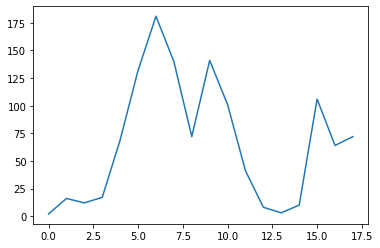

In [116]:
plt.plot(traffic[:-4])

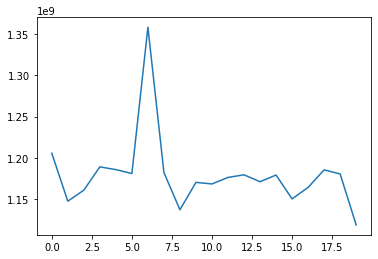

In [117]:
plt.plot(fp_list[1:])

In [119]:
# # travel_data.shape
# tensors = travel_data[:,:,:54]
# traffic = np.sum(np.sum(tensors, 2),1) # total traffic
# # outtraffic = np.sum(np.sum(tensors, 1),1)
# # traffic = intraffic +outtraffic

# plt.figure(figsize=(12,5))
# plt.plot(xaxis, traffic[:-3], label= 'Traffic volume')
# plt.plot(xaxis, datecount, label = 'Confirmed cases')
# plt.scatter(xaxis[3:6], traffic[3:6], color='red', label = 'The first wave')
# plt.scatter(xaxis[-8:-6], traffic[-8:-6], color='magenta', label = 'The second wave')
# plt.title("Traffic vs confimred cases")
# plt.legend()

In [120]:
day_list = [monday,tueday, wedday, friday,satday,sunday] 

In [121]:
sunday

DatetimeIndex(['2020-01-12', '2020-01-19', '2020-01-26', '2020-02-02',
               '2020-02-09', '2020-02-16', '2020-02-23', '2020-03-01',
               '2020-03-08', '2020-03-15', '2020-03-22', '2020-03-29',
               '2020-04-05', '2020-04-12', '2020-04-19', '2020-04-26',
               '2020-05-03', '2020-05-10', '2020-05-17', '2020-05-24',
               '2020-05-31'],
              dtype='datetime64[ns]', freq='7D')

In [122]:
# fp_list = []
# for d in sunday:
#     condition = (pop['date']<d) & (pop['date'] >= d - timedelta(days=7))
#     filtered_pop = pop[condition]
#     fp_list.append(filtered_pop['fp_num'].sum())
# #     if((date<x) & (date> x-timedelta(days=7))):

In [123]:
# satpop = pop[pop['date'].isin(satday)][['date','city','fp_num']]
# satpop = satpop.groupby(['date','city'])['fp_num'].sum().reset_index()
# sunpop = pop[pop['date'].isin(sunday)][['date','city','fp_num']]
# sunpop = satpop.groupby(['date','city'])['fp_num'].sum().reset_index()

In [124]:
# node_float_temp = week_pop
# node_float['fp_num'] = satpop['fp_num'] + sunpop['fp_num']
# node_float_temp.date = pd.to_datetime(node_float_temp.date)
# node_float_temp = week_pop[week_pop['city']=='Guro-gu']

In [125]:
pop[pop['city']=='Guro-gu']

,date,hour,birth_year,sex,province,city,fp_num
18,2020-01-01,0,20,female,Seoul,Guro-gu,26040
19,2020-01-01,0,20,male,Seoul,Guro-gu,27080
68,2020-01-01,1,20,female,Seoul,Guro-gu,26130
69,2020-01-01,1,20,male,Seoul,Guro-gu,27040
118,2020-01-01,2,20,female,Seoul,Guro-gu,26060
...,...,...,...,...,...,...,...
1084695,2020-05-30,9,60,female,Seoul,Guro-gu,23190
1084710,2020-05-30,15,20,male,Seoul,Guro-gu,26890
1084726,2020-05-30,20,30,female,Seoul,Guro-gu,34080
1084743,2020-05-31,2,70,male,Seoul,Guro-gu,13570


In [126]:
def node_float_pop(nodename):
    if(nodename=='Dongjak-gu'):
        nodename = 'Dongjag-gu'
    node_pop = pop[pop['city']==nodename]
    node_pop = node_pop[np.invert(node_pop['date'].isin(thuday))]
    fp_list = []
    for d in sunday:
        condition = (node_pop['date']< d) & (node_pop['date'] >= d - timedelta(days=7))
        filtered_pop = node_pop[condition]
        fpsum = filtered_pop['fp_num'].sum()
        if(fpsum>0):
            fp_list.append(fpsum)
        else:
            fp_list.append(fp_list[-1])
    return np.array(fp_list)

In [127]:
# def node_float_pop(nodename):
#     node_float_temp = week_pop
#     # node_float['fp_num'] = satpop['fp_num'] + sunpop['fp_num']
#     node_float_temp.date = pd.to_datetime(node_float_temp.date)
#     node_float_temp = week_pop[week_pop['city']==nodename]
#     return node_float_temp

In [128]:
node_float_pop('Geumcheon-gu')

array([33083700, 33012250, 31753610, 31829510, 32862880, 32858560,
       32596620, 37521320, 32835990, 31244720, 32245530, 32344470,
       32531520, 32607620, 31768360, 32383820, 30973420, 31237410,
       32652920, 32530970, 30822070])

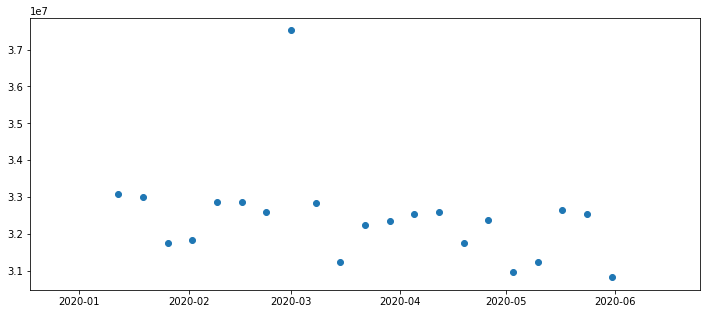

In [129]:
node_float = node_float_pop('Geumcheon-gu')
plt.figure(figsize=(12,5))
plt.scatter(sunday, node_float)

In [130]:
def node_confirmed_case(node_name):
    node_confdate = df[df['city']==node_name]['confirmed_date']
    datecount = []
    for x in xaxis:
        cnt=0
        for date in node_confdate:
            if((date<x) & (date>= x-timedelta(days=7))):
                cnt=cnt+1
        datecount.append(cnt)
    datecount = np.array(datecount)
    return datecount

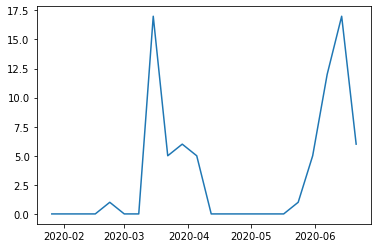

In [131]:
plt.plot(xaxis, node_confirmed_case('Guro-gu'))

In [132]:
with open('../pkl/COVID_sorted_W_tensors_ver2.pkl', 'rb') as f:
    travel_data = pickle.load(f) 

In [133]:
tensors = travel_data[:,:54,:54]
tensors.shape

(22, 54, 54)

In [134]:
def node_patient_traffic(node_num):
    cnt_num = node_num
    intraffic = np.sum(tensors[:,:,cnt_num], 1) #in-traffic
    outtraffic = np.sum(tensors[:,cnt_num,:], 1) #outtraffic
    return intraffic + outtraffic

In [135]:
node_float_pop('Guro-gu')[-18:]

array([50645840, 51343290, 50764830, 50785650, 59377090, 51826450,
       49444710, 50424460, 50299480, 50635440, 50679040, 50479580,
       50571610, 49139520, 50242490, 51176260, 50828180, 48036340])

In [136]:
node_patient_traffic(3)[:-3]

array([ 0.,  0.,  0.,  0.,  5., 15., 74., 26., 26.,  1.,  2.,  0.,  0.,
        0.,  0.,  5.,  5.,  3.,  2.])

In [137]:
node_confirmed_case('Guro-gu')[:-3]

array([ 0,  0,  0,  0,  1,  0,  0, 17,  5,  6,  5,  0,  0,  0,  0,  0,  0,
        1,  5])

In [138]:
# nodenum = 5
def three_plots_corr(nodenum):
    fig, axs = plt.subplots(3,figsize=(12,8))
    
    nodename = label_dict[nodenum]
    fig.suptitle(nodename, fontsize=20)

    flopop = node_float_pop(nodename)[2:]
    pait = node_patient_traffic(nodenum)[:-3]
    conf = node_confirmed_case(nodename)[:-3]

    axs[0].plot(xaxis[:-3], flopop, label = 'floating population')
    axs[1].plot(xaxis[:-3], pait, label = 'patient traffic')
    axs[2].plot(xaxis[:-3], conf, label = 'confirmed cases')
    axs[0].legend()
    axs[1].legend()
    axs[2].legend()

    print(np.corrcoef([flopop[:-1], pait[1:]]))
    print(np.corrcoef([pait[1:-1], conf[2:]]))

[[1.         0.07123423]
 [0.07123423 1.        ]]
[[1.         0.83242402]
 [0.83242402 1.        ]]


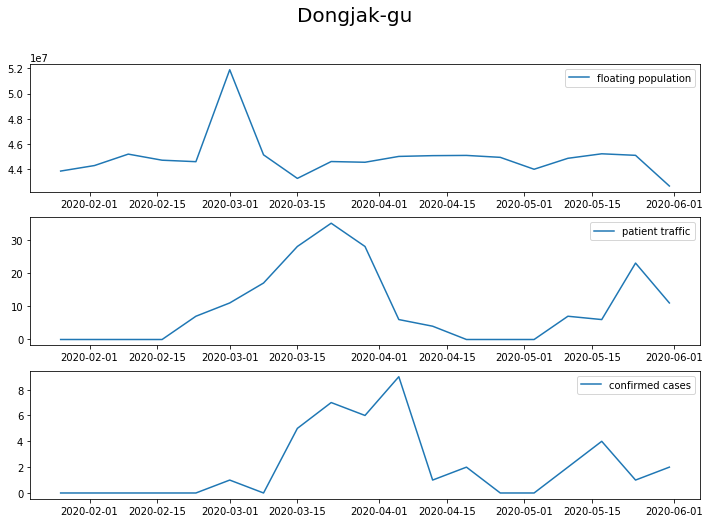

In [169]:
three_plots_corr(1)

In [173]:
# nodenum = 22
# nodename = label_dict[nodenum]

# flopop = node_float_pop(nodename)[2:]
# pait = node_patient_traffic(nodenum)[:-3]
# conf = node_confirmed_case(nodename)[:-3]

In [174]:
# augmented_dickey_fuller_statistics(pd.DataFrame(pait))

0.0003070222318083142

In [143]:
granger_df = pd.DataFrame([np.array(flopop), pait, conf]).T
granger_df.columns = ['flopop','patient','confirmation']
# granger_df = granger_df.set_index('date')

In [175]:
grangercausalitytests(granger_df[['patient','flopop']], maxlag=5)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0247  , p=0.8772  , df_denom=15, df_num=1
ssr based chi2 test:   chi2=0.0296  , p=0.8633  , df=1
likelihood ratio test: chi2=0.0296  , p=0.8634  , df=1
parameter F test:         F=0.0247  , p=0.8772  , df_denom=15, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0182  , p=0.9820  , df_denom=12, df_num=2
ssr based chi2 test:   chi2=0.0517  , p=0.9745  , df=2
likelihood ratio test: chi2=0.0516  , p=0.9745  , df=2
parameter F test:         F=0.0182  , p=0.9820  , df_denom=12, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.0748  , p=0.9720  , df_denom=9, df_num=3
ssr based chi2 test:   chi2=0.3990  , p=0.9404  , df=3
likelihood ratio test: chi2=0.3941  , p=0.9415  , df=3
parameter F test:         F=0.0748  , p=0.9720  , df_denom=9, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.5621  , p=0.0809  , df_den

{1: ({'ssr_ftest': (0.0246884740497131, 0.8772412630276883, 15.0, 1),
   'ssr_chi2test': (0.029626168859655723, 0.8633411926597351, 1),
   'lrtest': (0.029601814748872357, 0.863396821919357, 1),
   'params_ftest': (0.024688474049712476, 0.8772412630276883, 15.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.018235482514909022, 0.9819569335292668, 12.0, 2),
   'ssr_chi2test': (0.05166720045890889, 0.9744972322339684, 2),
   'lrtest': (0.05158884448665901, 0.9745354118209064, 2),
   'params_ftest': (0.018235482510096306, 0.9819569335339776, 12.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.07481835767019206, 0.9720161156549613, 9.0, 3),
   'ssr_chi2test': (0.399031240907691, 0.9404425450353741, 3),
   'lrtest': (0.39413664270831816, 0.941451046279718, 3),
   'params_ftest': (0.07481835767077571, 0.9720161156546528, 9.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 

In [150]:
# # n_obs=1
# dataset = granger_df
# # X_train, X_test = dataset[0:-n_obs], dataset[-n_obs:]
# X_train = dataset
# print(X_train.shape) #, X_test.shape)

In [151]:
def augmented_dickey_fuller_statistics(time_series):
    result = adfuller(time_series.values)
#     print('ADF Statistic: %f' % result[0])
#     print('p-value: %f' % result[1])
#     print('Critical Values:')
#     for key, value in result[4].items():
#         print('\t%s: %.3f' % (key, value))
    return result[1]

In [152]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import grangercausalitytests

In [153]:
# test = 'ssr-chi2test'
def grangers_causality_matrix(X_train, variables, test = 'ssr_chi2test', verbose=False):
    dataset = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in dataset.columns:
        for r in dataset.index:
#             print(r,c)
            test_result = grangercausalitytests(X_train[[r,c]], maxlag=maxlag, verbose=False)
#             print(test_result)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: 
                print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            dataset.loc[r,c] = min_p_value
    dataset.columns = [var + '_x' for var in variables]
    dataset.index = [var + '_y' for var in variables]
    return dataset

In [154]:
# var1 ='flopop'
# var2 ='patient'

# for nodenum in np.append(np.arange(21),[22,25,26,28]):
#     nodename = label_dict[nodenum]
#     #
#     flopop = node_float_pop(nodename)[2:]
#     pait = node_patient_traffic(nodenum)[:-3]
#     conf = node_confirmed_case(nodename)[:-3]
#     #
#     granger_df = pd.DataFrame([xaxis[:-3], np.array(flopop), pait, conf]).T
#     granger_df.columns = ['date','flopop','patient','confirmation']
#     dataset = granger_df.set_index('date')
#     dataset = dataset[[var1,var2]]
#     #
#     p1 = augmented_dickey_fuller_statistics(dataset[var1])
#     p2 = augmented_dickey_fuller_statistics(dataset[var2])
#     print(p1,p2)
# #     plt.plot(dataset[var1])
# #     print(dataset[var1].values)

In [155]:
def granger_caus(var1, var2):
    cnt=0
    p_list = []
    #22 25 26 28 
    for nodenum in np.append(np.arange(21),[22,25,26,28]):
        nodename = label_dict[nodenum]
        #
        try:
            flopop = node_float_pop(nodename)[2:]
            pait = node_patient_traffic(nodenum)[:-3]
            conf = node_confirmed_case(nodename)[:-3]
            #
            granger_df = pd.DataFrame([xaxis[:-3], np.array(flopop), pait, conf]).T
            granger_df.columns = ['date','flopop','patient','confirmation']
            dataset = granger_df.set_index('date')
            dataset = dataset[[var1,var2]]
            #
            p1 = augmented_dickey_fuller_statistics(dataset[var1])
            p2 = augmented_dickey_fuller_statistics(dataset[var2])
            #
#             print(p1,p2)
            if(p1<0.05):
                if(p2<0.05):
                    cnt=cnt+1
#                     print(str(nodenum)+",")
#                     var_2to1 = grangers_causality_matrix(dataset, variables = dataset.columns).iloc[0,1]
                    var_1to2 = grangers_causality_matrix(dataset, variables = dataset.columns).iloc[1,0] # var1->var2
                    p_list.append(var_1to2)
#                     print(nodenum, label_dict[nodenum])
#                     print(grangers_causality_matrix(dataset, variables = dataset.columns))
        except Exception:
            continue
    print("cnt",cnt)
    return p_list

In [156]:
def FDR(sorted_array):
    sample_size=len(sorted_array)
    cnt=0
    for i in range(sample_size):
        if(sorted_array[i]< 0.05*(i+1)/(sample_size)):
            cnt+=1
    return(cnt)

In [157]:
maxlag=4

In [158]:
test1 = np.sort(granger_caus('flopop','patient'))
print(test1)
print(FDR(test1))

cnt 7
[0.     0.     0.0046 0.0082 0.067  0.1236 0.214 ]
4


In [60]:
test2 = np.sort(granger_caus('patient','confirmation'))
print(test2)
print(FDR(test2))

cnt 3
[0.     0.0011 0.0124]
3


In [61]:
test3 = np.sort(granger_caus('flopop','confirmation'))
print(test3)
print(FDR(test3))

cnt 7
[0.     0.     0.     0.0143 0.0338 0.1852 0.3567]
5


In [48]:
sample_size=11
for i in range(1,sample_size+1):
    print(0.05*i/sample_size)

0.004545454545454546
0.009090909090909092
0.01363636363636364
0.018181818181818184
0.022727272727272728
0.02727272727272728
0.03181818181818182
0.03636363636363637
0.04090909090909091
0.045454545454545456
0.05


In [49]:
cnt=0
#22 25 26 28 
for nodenum in np.append(np.arange(21),[22,25,26,28]):
    nodename = label_dict[nodenum]
    #
    try:
        flopop = node_float_pop(nodename)[-18:]
        pait = node_patient_traffic(3)[:-3]
        conf = node_confirmed_case(nodename)[:-3]
        #
        granger_df = pd.DataFrame([xaxis[:-3], np.array(flopop), pait, conf]).T
        granger_df.columns = ['date','flopop','patient','confirmation']
        dataset = granger_df.set_index('date')
        dataset = dataset[['patient','confirmation']]
        #
        p1 = augmented_dickey_fuller_statistics(dataset['patient'])
        p2 = augmented_dickey_fuller_statistics(dataset['confirmation'])
#         p3 = augmented_dickey_fuller_statistics(dataset['confirmation'])
        #
        if(p1<0.05):
            if(p2<0.05):
                cnt=cnt+1
#                 if(p3<0.05):
#                     cnt=cnt+1
                print(nodenum, label_dict[nodenum])
                print(grangers_causality_matrix(dataset, variables = dataset.columns))
    except Exception:
        continue

In [50]:
cnt

0